### FIFA 19 Data Analysis

In this notebook I try to explore and visualize the Fifa19 data

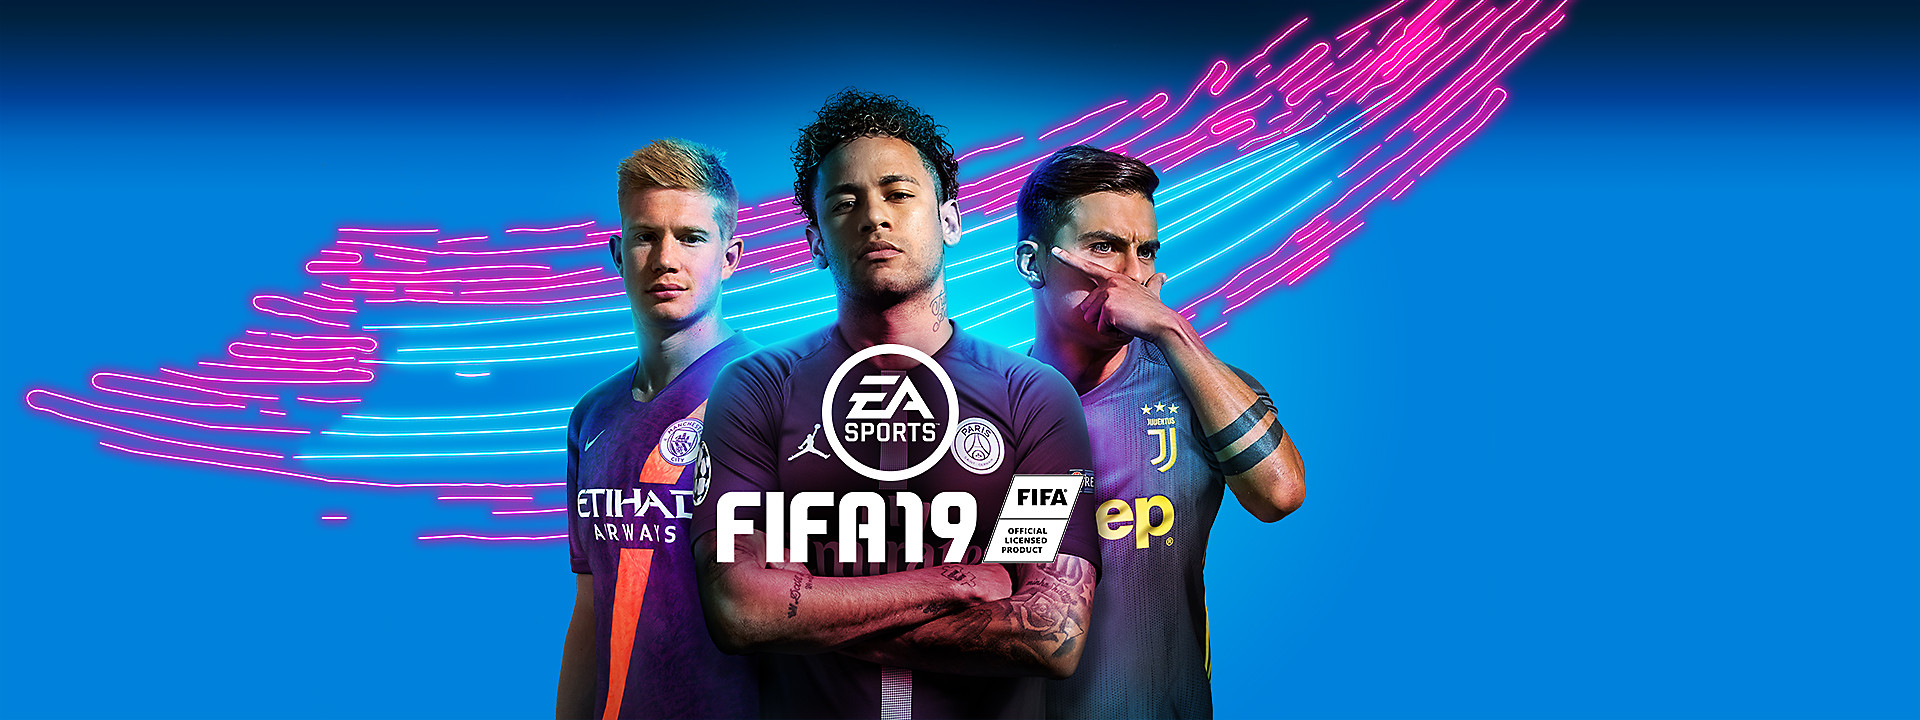

In [1]:
from IPython.display import Image
Image(filename='fifa-19.jpg')

Firstly import the module, then import the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fifa = pd.read_csv('data.csv')

data source: https://www.kaggle.com/karangadiya/fifa19#data.csv

In [4]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,4,51,76,90,58,75,94,82,5,High/ High


In [5]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Composure',
       'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Penalties', 'Position',
       'Positioning', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause',
       'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', '

In [6]:
fifa.shape

(13725, 87)

In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 87 columns):
Unnamed: 0                  13725 non-null int64
ID                          13725 non-null int64
Name                        13725 non-null object
Age                         13725 non-null int64
Photo                       13725 non-null object
Nationality                 13725 non-null object
Flag                        13725 non-null object
Overall                     13725 non-null int64
Potential                   13725 non-null int64
Club                        13533 non-null object
Club Logo                   13725 non-null object
Value                       13725 non-null object
Wage                        13725 non-null object
Special                     13725 non-null int64
Acceleration                13725 non-null int64
Aggression                  13725 non-null int64
Agility                     13725 non-null int64
Balance                     13725 non-null int64
B

### Checking null values

In [8]:
total = fifa.isnull().sum().sort_values(ascending = False)
percent = (fifa.isnull().sum()/fifa.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Loaned From,Joined,RM,RF,RDM,RCM,RCB,RB,LAM,RS,...,Weak Foot,Jumping,Interceptions,HeadingAccuracy,GKReflexes,GKPositioning,GKKicking,GKHandling,GKDiving,Unnamed: 0
Total,12656.000000,2302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,92.211293,16.772313,9.486339,9.486339,9.486339,9.486339,9.486339,9.486339,9.486339,9.486339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize Overall by age

In [9]:
fifa.groupby('Age').Overall.agg(['count','max','min','mean'])

,count,max,min,mean
Age,,,,
16,3,64,63,63.666667
17,41,77,62,64.902439
18,142,81,62,65.556338
19,306,87,62,66.313725
20,556,82,62,66.886691
21,828,83,62,67.629227
22,911,86,62,68.028540
23,1038,85,62,68.664740
24,1159,89,62,68.950820


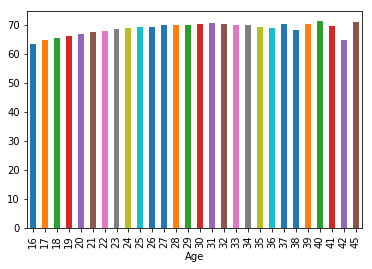

In [10]:
fifa.groupby('Age').Overall.mean().plot(kind='bar')

### see the player with age 40 or more

In [11]:
fifa[['Name','Position','Age','Overall','Stamina']].loc[(fifa['Age']>=40)]

,Name,Position,Age,Overall,Stamina
41,G. Buffon,SUB,40,88,39
899,Hilton,CB,40,78,54
1183,J. Villar,GK,41,77,22
1345,A. Bizzarri,GK,40,76,31
2348,S. Bertoli,GK,40,74,19
3627,S. Nakamura,CAM,40,72,45
4293,B. Nivet,CAM,41,71,41
4820,O. Pérez,GK,45,71,41
5100,C. Lucchetti,GK,40,70,35
7349,C. Muñoz,GK,41,68,29


In [12]:
fifa[['Position','Age']].loc[(fifa['Age']>=40)].groupby('Position').count()

,Age
Position,
CAM,2
CB,1
GK,6
LB,1
LCB,2
RCB,1
SUB,3


All old player have low stamina, but some of them are still in the first team

### Plotting RadarChart

RadarChart source: https://github.com/rupav/FIFA17-Detailed-Analysis

In [13]:
def _scale_data(datas,ranges): #data of 1 row is provided, with every column ranges
    
    (x1,x2) = ranges[0]
    diff = x2-x1
    fact = 0
    scaled_data = []
    for data, (y1,y2) in zip(datas,ranges):
        
        fact = ((data-y1)/(y2-y1))*diff
        scaled_data.append(fact+x1)
    return scaled_data

'''
class RadarChart
'''

class RadarChart():
    
    def __init__(self,fig,attributes,ranges,n_ordinate_levels=6):
        #n_ordinate_levels is for grid scaping, attributes being features, ranges is a list of all feature ranges
        angles = np.arange(0, 360, 360./len(attributes))
        
        '''
        Add an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height. 
        kwargs are legal Axes kwargs plus projection which sets the projection type of the axes. 
        (For backward compatibility, polar=True may also be provided, which is equivalent to projection='polar'). Valid values for projection are [‘aitoff’, ‘hammer’, ‘lambert’, ‘mollweide’, ‘polar’, ‘rectilinear’].
        Some of these projections support additional kwargs, which may be provided to add_axes(). 
        
        '''

        
        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar=True,label="axis{}".format(i)) for i in range(len(attributes))] #we use label to distinguish b/w different axes, its a must, else we dont get different axes!
            
        _,text = axes[0].set_thetagrids(angles,labels = attributes)
        
        '''
        Set the angles at which to place the theta grids (these
        gridlines are equal along the theta dimension).  *angles* is in
        degrees.
        Return value is a list of tuples (*line*, *label*), where   #here (_,text)
        *line* is :class:`~matplotlib.lines.Line2D` instances and the  
        *label* is :class:`~matplotlib.text.Text` instances.    
        '''
        
        for txt,angle in zip(text,angles):
            txt.set_rotation(angle-90)
            txt.set_size(15)
            
        '''
        Axes contains a Patch patch which is a Rectangle for Cartesian coordinates and a Circle for polar coordinates;
        this patch determines the shape, background and border of the plotting region;
        '''    
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)  #patch is background
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i,ax in enumerate(axes):
            
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""] + [str(int(x)) for x in grid[1:]]                 ## circular grid label, from inner circle to outer circle
            ax.set_rgrids(grid,labels = grid_label,angle=angles[i])              ##rgrid is radia grids
                                                                                #grid here requires, starting circle distances, last circle dist, no. of circles i.e. *ranges[i],n_ordinate_levels
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles,angles[0]])
        self.ranges  = ranges
        self.ax = axes[0]
        
    def plot(self,data,*args,**kwargs):                                    ##for plotting lines
        scaled_data = _scale_data(data,self.ranges)
        self.ax.plot(self.angle,np.r_[scaled_data,scaled_data[0]],*args,**kwargs)
            
    def fill(self,data,*args,**kwargs):
        scaled_data = _scale_data(data,self.ranges)                             ##for filling those lines generated polygon with color
        self.ax.fill(self.angle,np.r_[scaled_data,scaled_data[0]],*args,**kwargs)
        
    def legend(self,*args,**kwargs):                                       ##for labelling row name, i.e about self
        self.ax.legend(*args,**kwargs)
    
        
            
'''
class over 
'''

'\nclass over \n'

Cristiano Ronaldo RadarChart as one of the besat player in the world

In [14]:
CRonaldo = fifa[fifa.loc[:,'Name']=='Cristiano Ronaldo'].T
CRonaldo

,1
Unnamed: 0,1
ID,20801
Name,Cristiano Ronaldo
Age,33
Photo,https://cdn.sofifa.org/players/4/19/20801.png
Nationality,Portugal
Flag,https://cdn.sofifa.org/flags/38.png
Overall,94
Potential,94
Club,Juventus


C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a bo

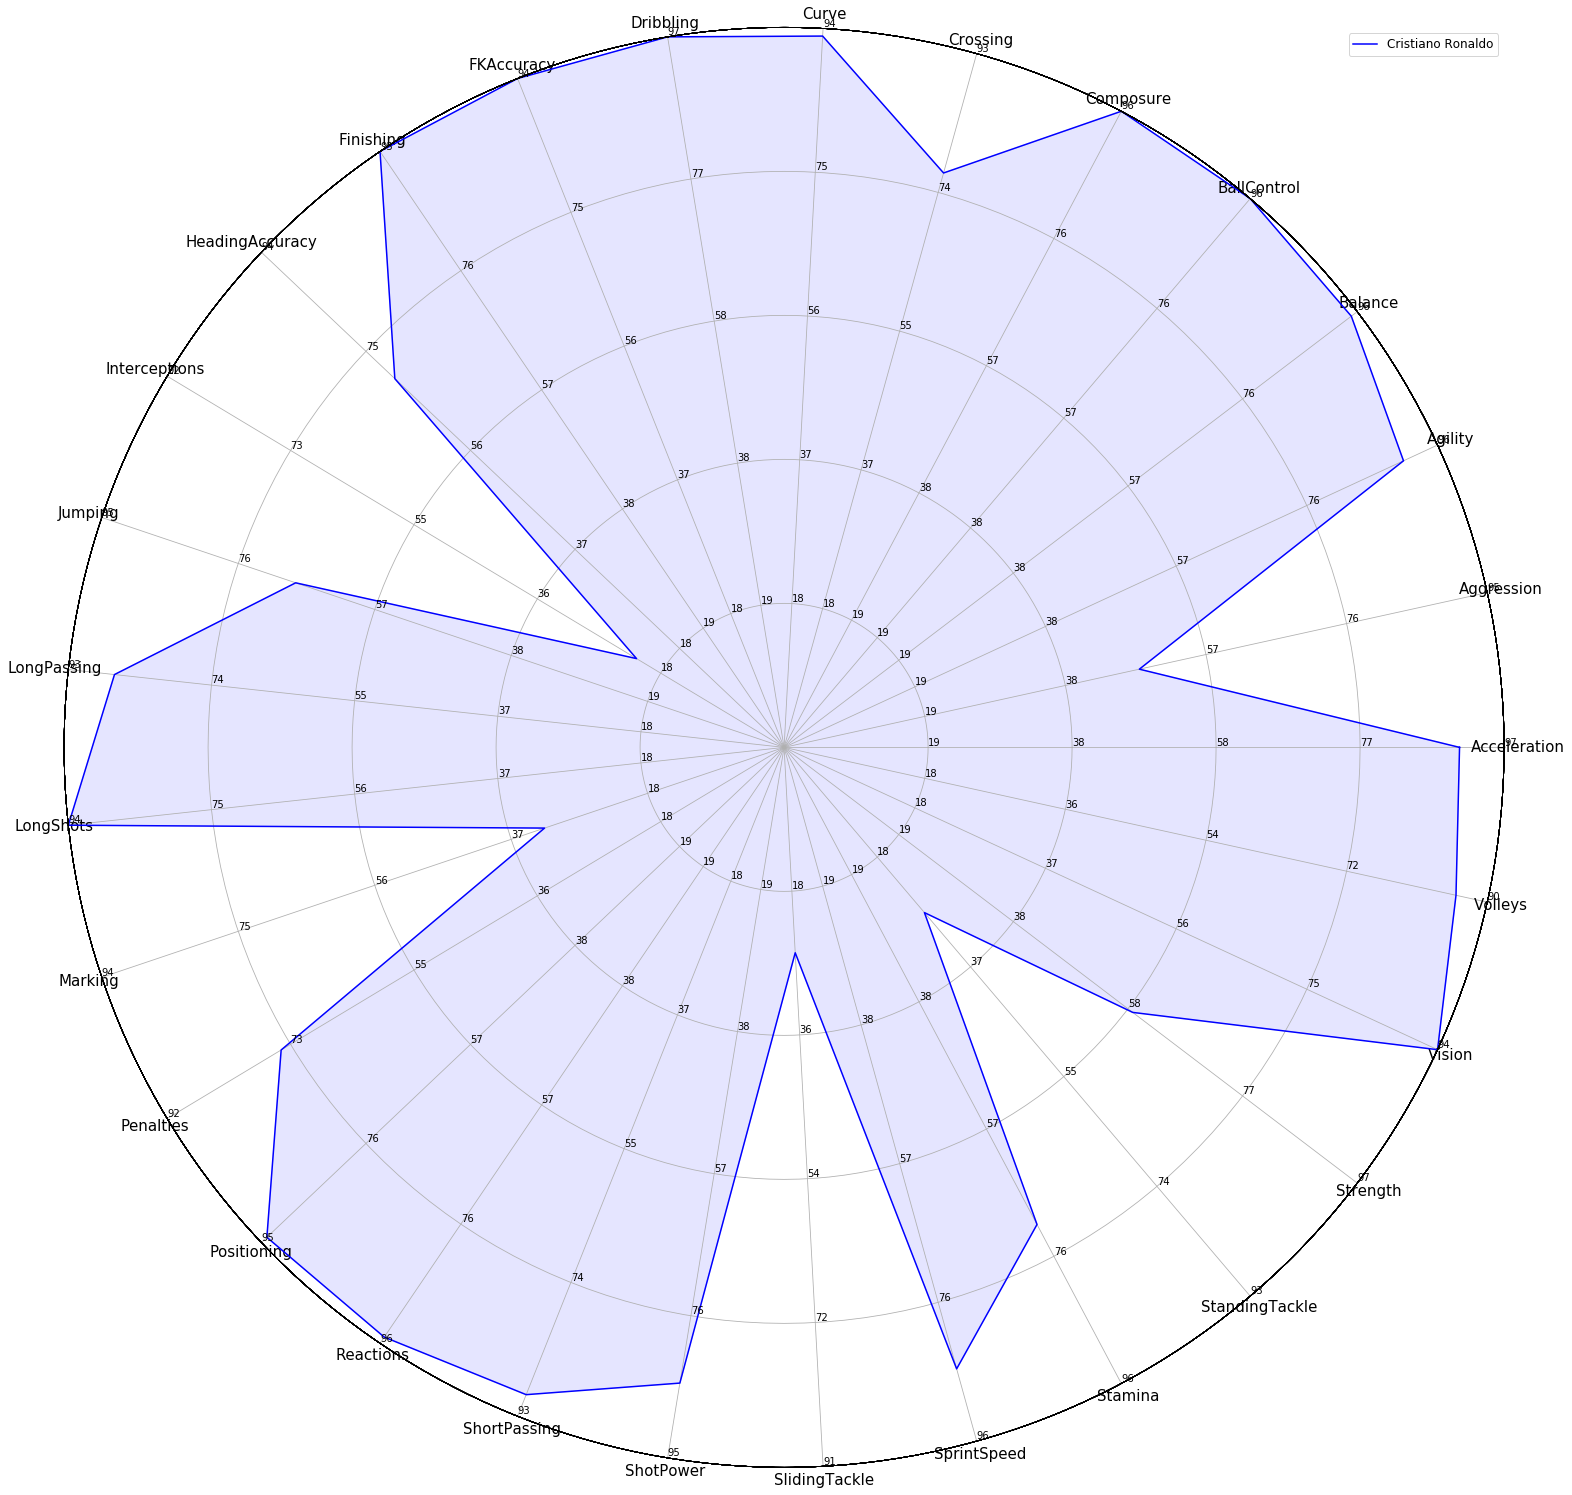

In [15]:
# colors = ['blue','green','red']             
colors = ['blue']
chosen_players = ['Cristiano Ronaldo']


attributes = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Composure', 'Crossing', 'Curve', 
              'Dribbling', 'FKAccuracy','Finishing', 'HeadingAccuracy', 'Interceptions', 'Jumping', 'LongPassing', 
              'LongShots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'ShortPassing', 'ShotPower', 
              'SlidingTackle', 'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision', 'Volleys']
ranges = [[2**-20, fifa[attr].max()] for attr in attributes]
datas = fifa[attributes].values

fig = plt.figure(figsize=(25,25))
radar = RadarChart(fig,attributes,ranges)
for player,data,color in zip(chosen_players,datas,colors):
    radar.plot(data,color = color,label=player)  
    radar.legend(loc = 1, fontsize = 'large')
    radar.fill(data, alpha = 0.1, color = color)
plt.show()